In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
FILE_PATH = '../dataverse_files/'
PROCESSED_PATH = FILE_PATH + 'processed/'

# Analyzing data

In [3]:
full_df = pd.read_csv(PROCESSED_PATH + 'all_news_processed_data.csv')

Filtering for shows that have had at least 100 transcripts, even though we split the long transcipts into mulitple lines if it was over 5000 words long this is a good enough estimate at this point

In [4]:
full_df[full_df['channel.name']=='MSNBC']['full_date'].max()

'2022-02-02'

In [5]:
filt_soft_news_df = full_df[full_df.groupby(['program.name','channel.name'])['prob_soft_news_us'].transform('count') > 100]

# Comparing the size of the original dataframe to the new filtered dataframe
print (f'Original dataframe size: {full_df.shape}')
print (f'Filtered dataframe size: {filt_soft_news_df.shape}')

Original dataframe size: (2721555, 6)
Filtered dataframe size: (2718407, 6)


## Prob of soft news per show in channels

In [6]:
# Deteriming the mean probability of each show's containing soft news
soft_news_df_grp = filt_soft_news_df.groupby(['program.name','channel.name'])['prob_soft_news_us'].mean().reset_index()
soft_news_df_grp = soft_news_df_grp.sort_values(['channel.name','prob_soft_news_us','program.name'])

[Text(0.5, 1.0, 'Soft news by show in Channel')]

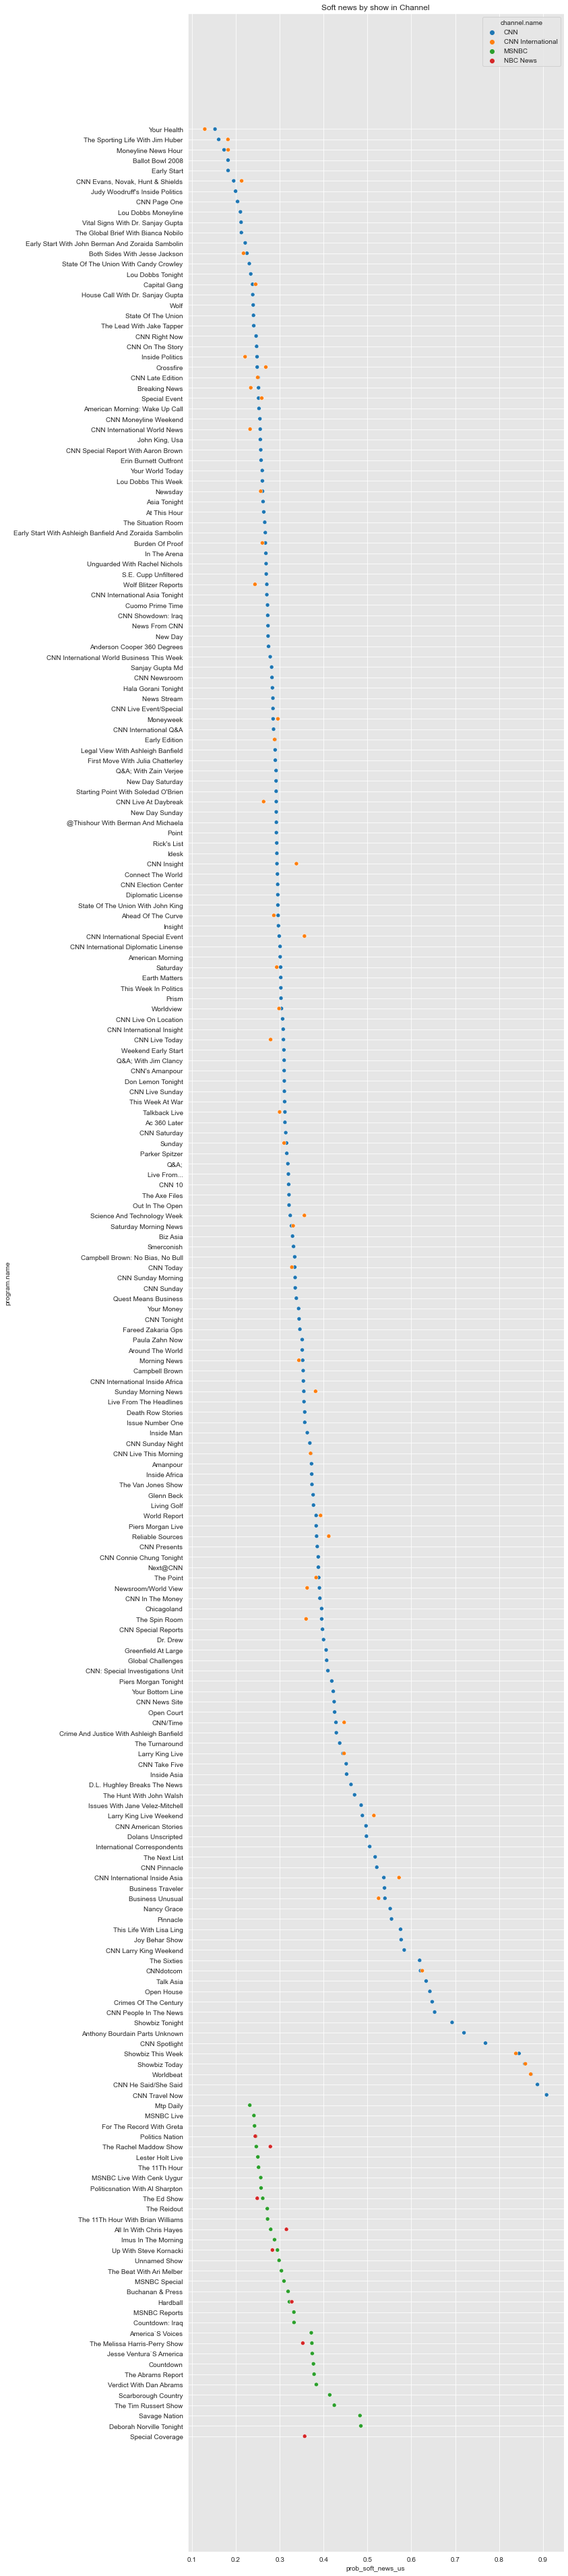

In [8]:
# Showing show averages per channel
fig, ax = plt.subplots(figsize=(10,soft_news_df_grp.shape[0]/4))

sns.set_style("darkgrid", {"axes.facecolor": ".9"})
sns.scatterplot(x="prob_soft_news_us", y="program.name", data=soft_news_df_grp,
                      hue="channel.name", ax=ax, size_norm=.2
                ).set(title='Soft news by show in Channel')

In [9]:
fig.savefig('../figs/shows_per_channel.png')

## Prob of soft news per channel

[Text(0.5, 1.0, 'Channel Averages')]

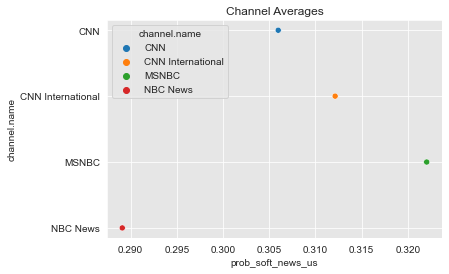

In [10]:
# Showing overall channel averages
channel_averages = filt_soft_news_df.groupby('channel.name')['prob_soft_news_us'].mean().reset_index()
channel_averages = channel_averages.sort_values('channel.name')

fig, ax = plt.subplots(figsize=(6,4))
sns.scatterplot(x="prob_soft_news_us", y="channel.name", data=channel_averages,
                      hue="channel.name"
                ).set(title='Channel Averages')

In [11]:
fig.savefig('../figs/channel_average.png')

## Trendline of soft news by channel

In [12]:
full_df['full_date'] = pd.to_datetime(full_df['full_date'])

In [13]:
# grouping the data by channel in each month of the year
soft_news_df_grp = full_df.groupby('channel.name').resample('M', on='full_date').mean().reset_index()

In [14]:
soft_news_df_grp

channel.name  full_date    Unnamed: 0  prob_soft_news_us
0            CNN 2000-01-31  3.474776e+03           0.297628
1            CNN 2000-02-29  9.493597e+03           0.287877
2            CNN 2000-03-31  1.527430e+04           0.308097
3            CNN 2000-04-30  2.067910e+04           0.333230
4            CNN 2000-05-31  2.613557e+04           0.341381
..           ...        ...           ...                ...
587     NBC News 2014-08-31  2.801006e+06           0.296635
588     NBC News 2014-09-30  2.790083e+06           0.283851
589     NBC News 2014-10-31  2.775087e+06           0.268285
590     NBC News 2014-11-30  2.787899e+06           0.252101
591     NBC News 2014-12-31  2.790607e+06           0.290237

[592 rows x 4 columns]

In [15]:
fig = px.scatter(soft_news_df_grp, x="full_date", y="prob_soft_news_us", trendline="lowess", color='channel.name')
fig.show()

In [16]:
fig.write_image('../figs/channel_trendline_month.png', width=1600, height=900)

## Data Coverage Plot

In [17]:
full_df.drop(full_df[full_df['full_date'].isnull()].index, axis=0, inplace=True)
full_df['year'] = np.int16(full_df['full_date'].dt.year)
full_df['month'] = np.int16(full_df['full_date'].dt.month)

In [18]:
soft_news_df_grp = full_df.groupby(['year','month','channel.name']).mean()
soft_news_df_grp.drop('Unnamed: 0', axis=1, inplace=True)
soft_news_df_grp

prob_soft_news_us
year month channel.name                        
2000 1     CNN                         0.297628
           CNN International           0.316287
     2     CNN                         0.287877
           CNN International           0.289118
     3     CNN                         0.308097
...                                         ...
2021 12    MSNBC                       0.275226
2022 1     CNN                         0.266410
           MSNBC                       0.251618
     2     CNN                         0.203935
           MSNBC                       0.292182

[586 rows x 1 columns]

In [19]:
data_cvg = soft_news_df_grp.loc[:,:,'CNN'].reset_index().pivot(index='month', columns='year', values='prob_soft_news_us')

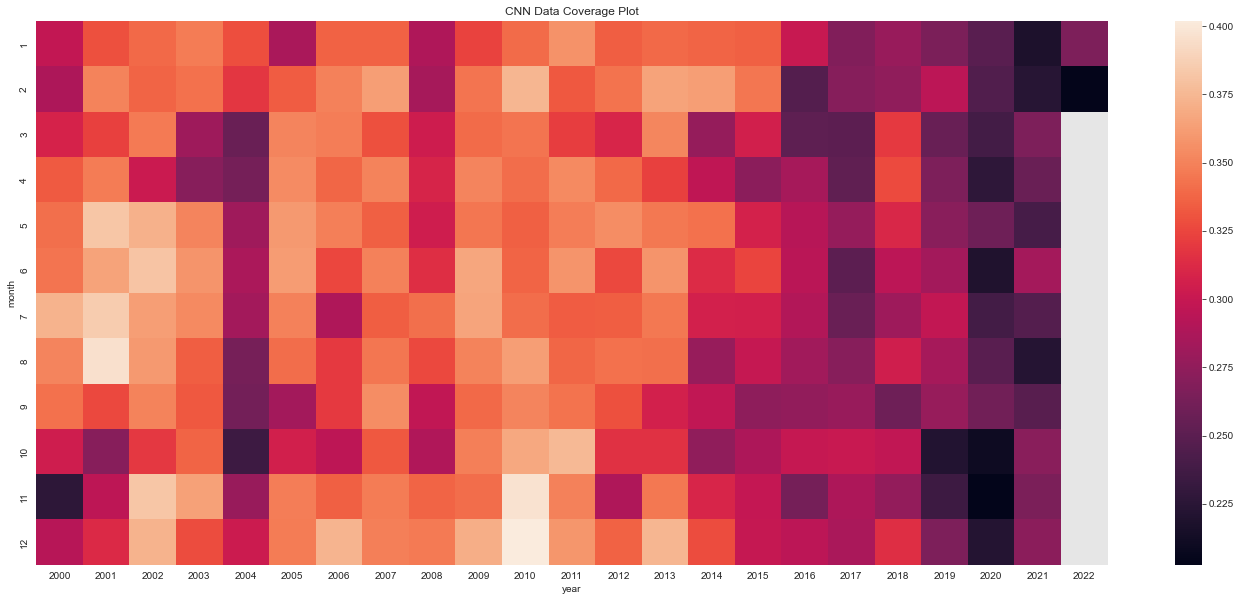

In [20]:
fig, ax = plt.subplots(figsize=(24,10))
plt.title('CNN Data Coverage Plot')
sns.heatmap(data_cvg)
plt.show()

In [21]:
fig.savefig('../figs/data_cov_plot_cnn.png')

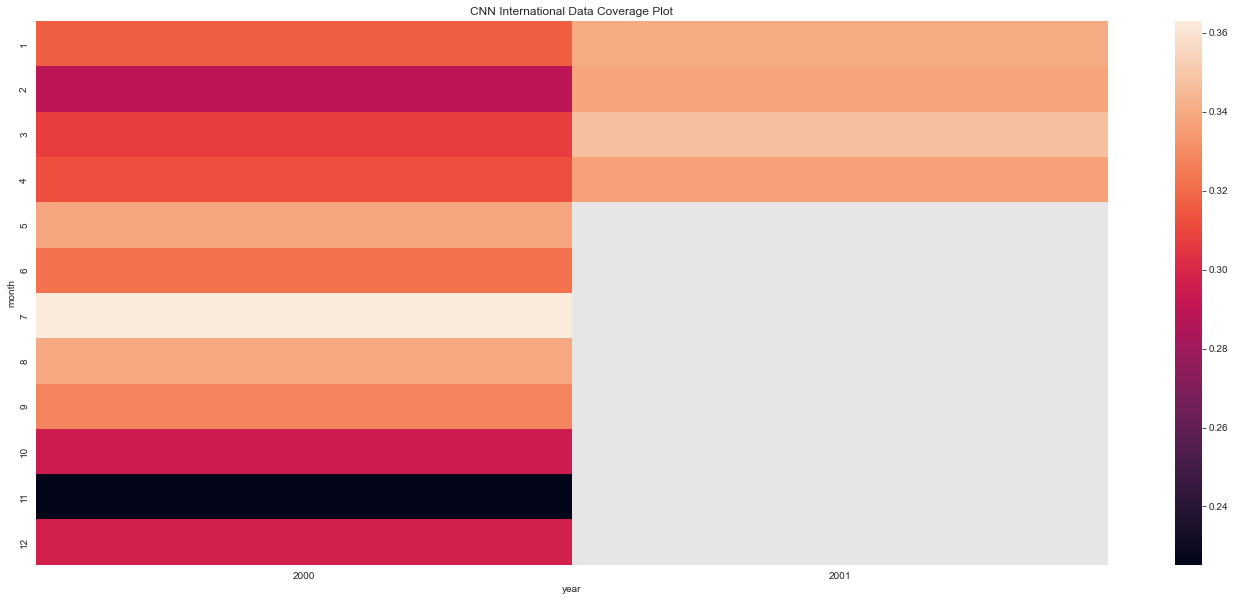

In [22]:
data_cvg = soft_news_df_grp.loc[:,:,'CNN International'].reset_index().pivot(index='month', columns='year', values='prob_soft_news_us')

fig, ax = plt.subplots(figsize=(24,10))
plt.title('CNN International Data Coverage Plot')
sns.heatmap(data_cvg)
plt.show()
fig.savefig('../figs/data_cov_plot_cnn_international.png')

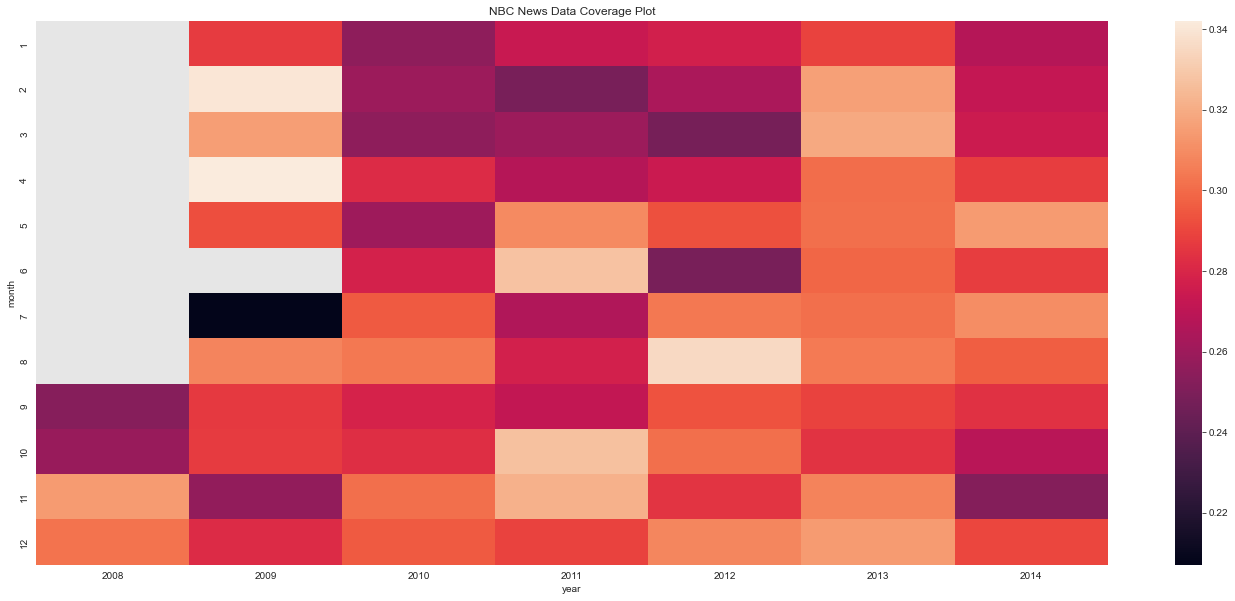

In [23]:
data_cvg = soft_news_df_grp.loc[:,:,'NBC News'].reset_index().pivot(index='month', columns='year', values='prob_soft_news_us')

fig, ax = plt.subplots(figsize=(24,10))
plt.title('NBC News Data Coverage Plot')
sns.heatmap(data_cvg)
plt.show()
fig.savefig('../figs/data_cov_plot_nbc_news.png')

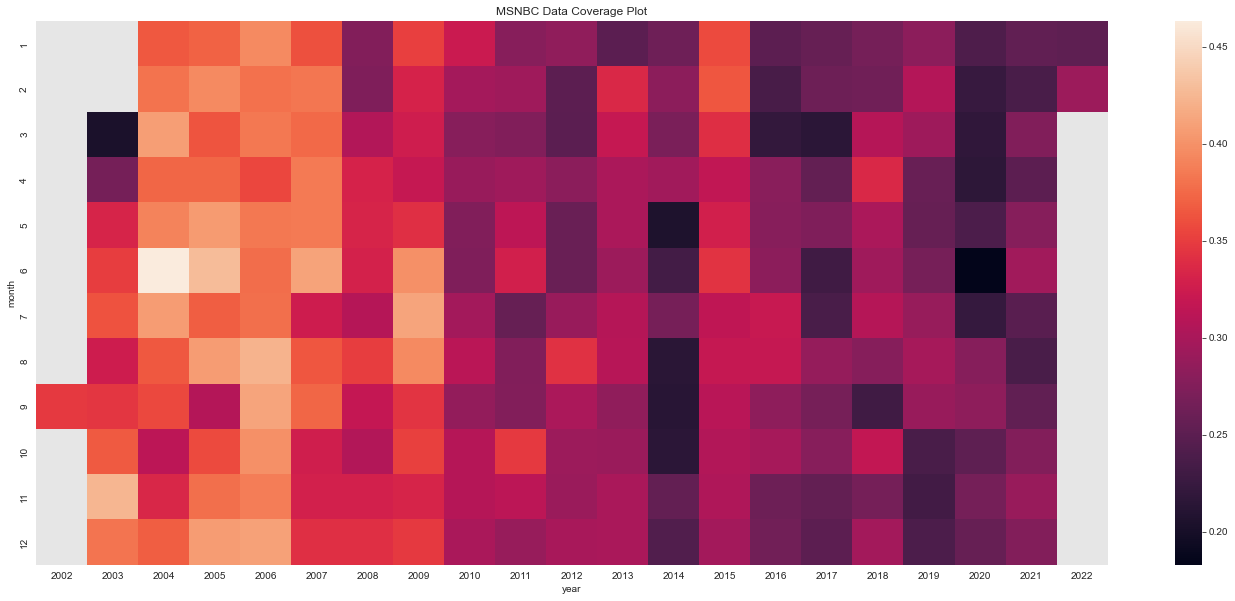

In [24]:
data_cvg = soft_news_df_grp.loc[:,:,'MSNBC'].reset_index().pivot(index='month', columns='year', values='prob_soft_news_us')

fig, ax = plt.subplots(figsize=(24,10))
plt.title('MSNBC Data Coverage Plot')
sns.heatmap(data_cvg)
plt.show()
fig.savefig('../figs/data_cov_plot_msnbc.png')

## Show sample data of predictions

In [25]:
pd.set_option('display.max_colwidth',300)

In [26]:
high_soft_df = full_df[full_df['prob_soft_news_us'] > 0.999626 ].sample(n=20)
low_soft_df = full_df[full_df['prob_soft_news_us'] == 0].sample(n=20)

In [27]:
high_soft_df[['channel.name','program.name','text','prob_soft_news_us']]

channel.name                 program.name  \
681121           CNN                 CNN Newsroom   
2565945        MSNBC          Scarborough Country   
387563           CNN             American Morning   
2301238          CNN                 CNN Newsroom   
2123710          CNN                 At This Hour   
52588            CNN                    CNN Today   
844518           CNN                 CNN Newsroom   
2307460          CNN                 CNN Newsroom   
113322           CNN               CNN Live Today   
1561130          CNN         Quest Means Business   
2307406          CNN                 CNN Newsroom   
680580           CNN           The Situation Room   
1597972          CNN             New Day Saturday   
998837           CNN                     Dr. Drew   
1388971          CNN  Anderson Cooper 360 Degrees   
2108009          CNN               New Day Sunday   
2137187          CNN               New Day Sunday   
163551           CNN           CNN Sunday Morning   
456854           CNN             Your World Today   
2133571          CNN                 CNN Newsroom   

                                                                                                                                                                                                                                                                                                                text  \
681121   to Florida, and blah, blah, blah. You can't answer every single one. Is there anywhere that people can figure out a good place to travel, a place not to travel at all. Does Travelocity answer that? What should people do with their itineraries? ZIFF: Well essentially we are following the CDC and ...   
2565945  Let me ask a question of Nadine Mendoza. Nadine, give me the background here. I love conspiracy. I mean, what\'s the\nbig picture? You\'ve got Viacom. You\'ve got Cruise, "Mission Impossible III." Spell it out for me.\n \n\n NADINE MENDOZA, "TV GUIDE": Well, basically, none of this has been offi...   
387563   an awful lot of criticism in Washington and elsewhere over the plan to charge people to leave Beirut and make their way to Cyprus. New Hampshire Senator John Sununu, who happens to be of Lebanese descent, was right at the center of the criticism in this case, calling for the government to waive ...   
2301238  towards Tokyo. The cases here, continuing to rise as well so with less than 3 months to go before these games are set to take place, again the idea that they're going to be held, no matter what, even if the pandemic continues to play out the way it is, seems inevitable. Michael? HOLMES: Yes. All...   
2123710  of the game, what people will talk about is this idea of social distancing, trying to isolate people as much as possible, as much as reasonable for a period of time. A couple of weeks perhaps. And that means kids staying home from school, people trying to work from home. But also, you know, do y...   
52588    NATALIE ALLEN, CNN ANCHOR: With tensions in the Persian Gulf running high, U.S. officials have issued a travel advisory. CNN State Department correspondent Andrea Koppel joins us from Washington to tell us about it -- Andrea. ANDREA KOPPEL, CNN STATE DEPARTMENT CORRESPONDENT: Natalie, the State ...   
844518   of information and consequently - consequently they also probably share some information. What's your recommendation on that? HAMILTON: Right. Well, I think it's probably not a bad idea to ask someone for a direction or something, but I wouldn't reveal any more than I had to. (END VIDEOTAPE) WHI...   
2307460  people, are fully vaccinated. In New York City mayor Bill de Blasio is promising some big changes for the public school system. (BEGIN VIDEOTAPE) ALEXANDRA FIELD, CNN CORRESPONDENT: I'm Alexandra Field in New York City. The nation's largest school district will be back fully for in- person learn...   
113322   (BEGIN VIDEOTAPE) ANNOUNCER: Jon Deason from Orlando, Florida asks, "In light

In [28]:
low_soft_df[['channel.name','program.name','text','prob_soft_news_us']]

channel.name                       program.name  \
2068299          CNN                       CNN Newsroom   
595180           CNN                       CNN Newsroom   
1907817          CNN          The Lead With Jake Tapper   
1850514          CNN                            New Day   
2713983        MSNBC             The Rachel Maddow Show   
1906617          CNN                            New Day   
2299197          CNN        Anderson Cooper 360 Degrees   
1643807          CNN                  Don Lemon Tonight   
1907078          CNN                            New Day   
1067612          CNN                       CNN Newsroom   
2023425          CNN                            New Day   
1906588          CNN                            New Day   
2532179        MSNBC                          Countdown   
1907976          CNN                       CNN Newsroom   
2213913          CNN                 The Situation Room   
1542540          CNN                     New Day Sunday   
2676833        MSNBC                           Hardball   
1646274          CNN  Vital Signs With Dr. Sanjay Gupta   
2089395          CNN                     New Day Sunday   
1906813          CNN          The Lead With Jake Tapper   

                                                                                                                                                                                                                                                                                                                text  \
2068299                                                                                 Paula Newton, CNN. CHURCH: And thanks so much for joining us. I'm Rosemary Church. Vital Signs is up next. But first, I'll be back with the check of the headlines. You're watching CNN. Do stay with us. (COMMERCIAL BREAK)   
595180   article from Senator McCain that mirrors Senator Obama's piece. HOWARD KURTZ, "WASHINGTON POST": It asks for far more detail and it wanted McCain to address the use of timetables. John McCain opposes timetables for withdrawal in Iraq. KAYE: "Washington Post" media reporter Howard Kurtz says "The...   
1907817  JIM SCIUTTO, CNN ANCHOR: Looks like President Trump has an approval problem inside and outside his White House. THE LEAD starts right now. Plunging approval. Haunted by a book and an op-ed that say the president is a danger to the country, brand-new CNN polls releasing right now on THE LEAD show...   
1850514  eight is not Pennsylvania. LAH (on camera): You may notice a little something as you take a look at this crowd. It's older, predominantly white. That's because that's what the voters of this congressional district look like. LAH (voice-over): Most importantly, registered Republicans outnumber De...   
2713983  CHRIS HAYES, MSNBC HOST, "ALL IN": Yeah, trust I guess is the theme of our era in many ways. Pat Kane, thank you so much for making time tonight. Really appreciate it. PAT KANE, EXECUTIVE DIRECTOR OF THE NEW YORK STATE NURSES ASSOCIATION: Thank you, Chris. HAYES: That is "ALL IN" on this Thursda...   
1906617  PRESIDENT OF THE UNITED STATES: The failing "New York Times" has an anonymous editorial. Can you believe it -- anonymous? UNIDENTIFIED FEMALE: There were whispers among cabinet officials about invoking the 25th Amendment. SEN. LINDSEY GRAHAM (R), SOUTH CAROLINA: This is not a treasonous act. It'...   
2299197  were on three Republican presidential campaigns. Michael, thanks for being with us. I want to read another portion of Congresswoman Cheney's new op-ed in "The Washington Post," she writes about the former President's election lies in part saying, "Trump repeats these words now with full knowledg...   
1643807  sometimes unpopular speech and, you know, you can't shut it down. This is really tough. LEMON: Yes. LEWIS: I think Twitter is going to have this -- maybe have like a serious "Come to Jesus" meeting and decide, what they want this to be. LEMON: I agree. Good conve

In [29]:
high_soft_df.to_csv('../tabs/high.csv')
low_soft_df.to_csv('../tabs/low.csv')